## **Problem Statement**

Extract the segments of customers depending on their behaviour patterns provided in the dataset, to focus marketing strategy of the company on a particular segment.

**1. Importing the necessary libraries.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**2.Loading the dataset.**

In [2]:
df=pd.read_csv('CC GENERAL.csv')

In [3]:
df.head() ##Looking at the dataset

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.shape # Knowing the shape of the dataset

(8950, 18)

We can see that there are 8590 rows (i.e records) and 18 columns(i.e features).

**3. Data Preprocessing**

Lets check whether there are any missing values in the data.

In [5]:
df.info() ##checking the complete info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
##Checking the null values explicitly
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

We can observe that columns **"CREDIT_LIMIT"** and **"MINIMUM_PAYMENTS"** have some NaN values.

In column **CREDIT_LIMIT**, there is only 1 null value, we can simply drop that record.

In [7]:
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In column **MINIMUM_PAYMENT** we can replace all the NaN values with the median of the same column.

In [8]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(),inplace=True)

In [9]:
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Now, we are good to go further :)

If we look at the dataset, Customer ID seems to be an unique id for each customer and hence won't pay any role in determining the cluster.

In [10]:
df.drop(['CUST_ID'],axis=1,inplace=True)

**4. Data Visualisation**

Lets visualise how skewed our data is.

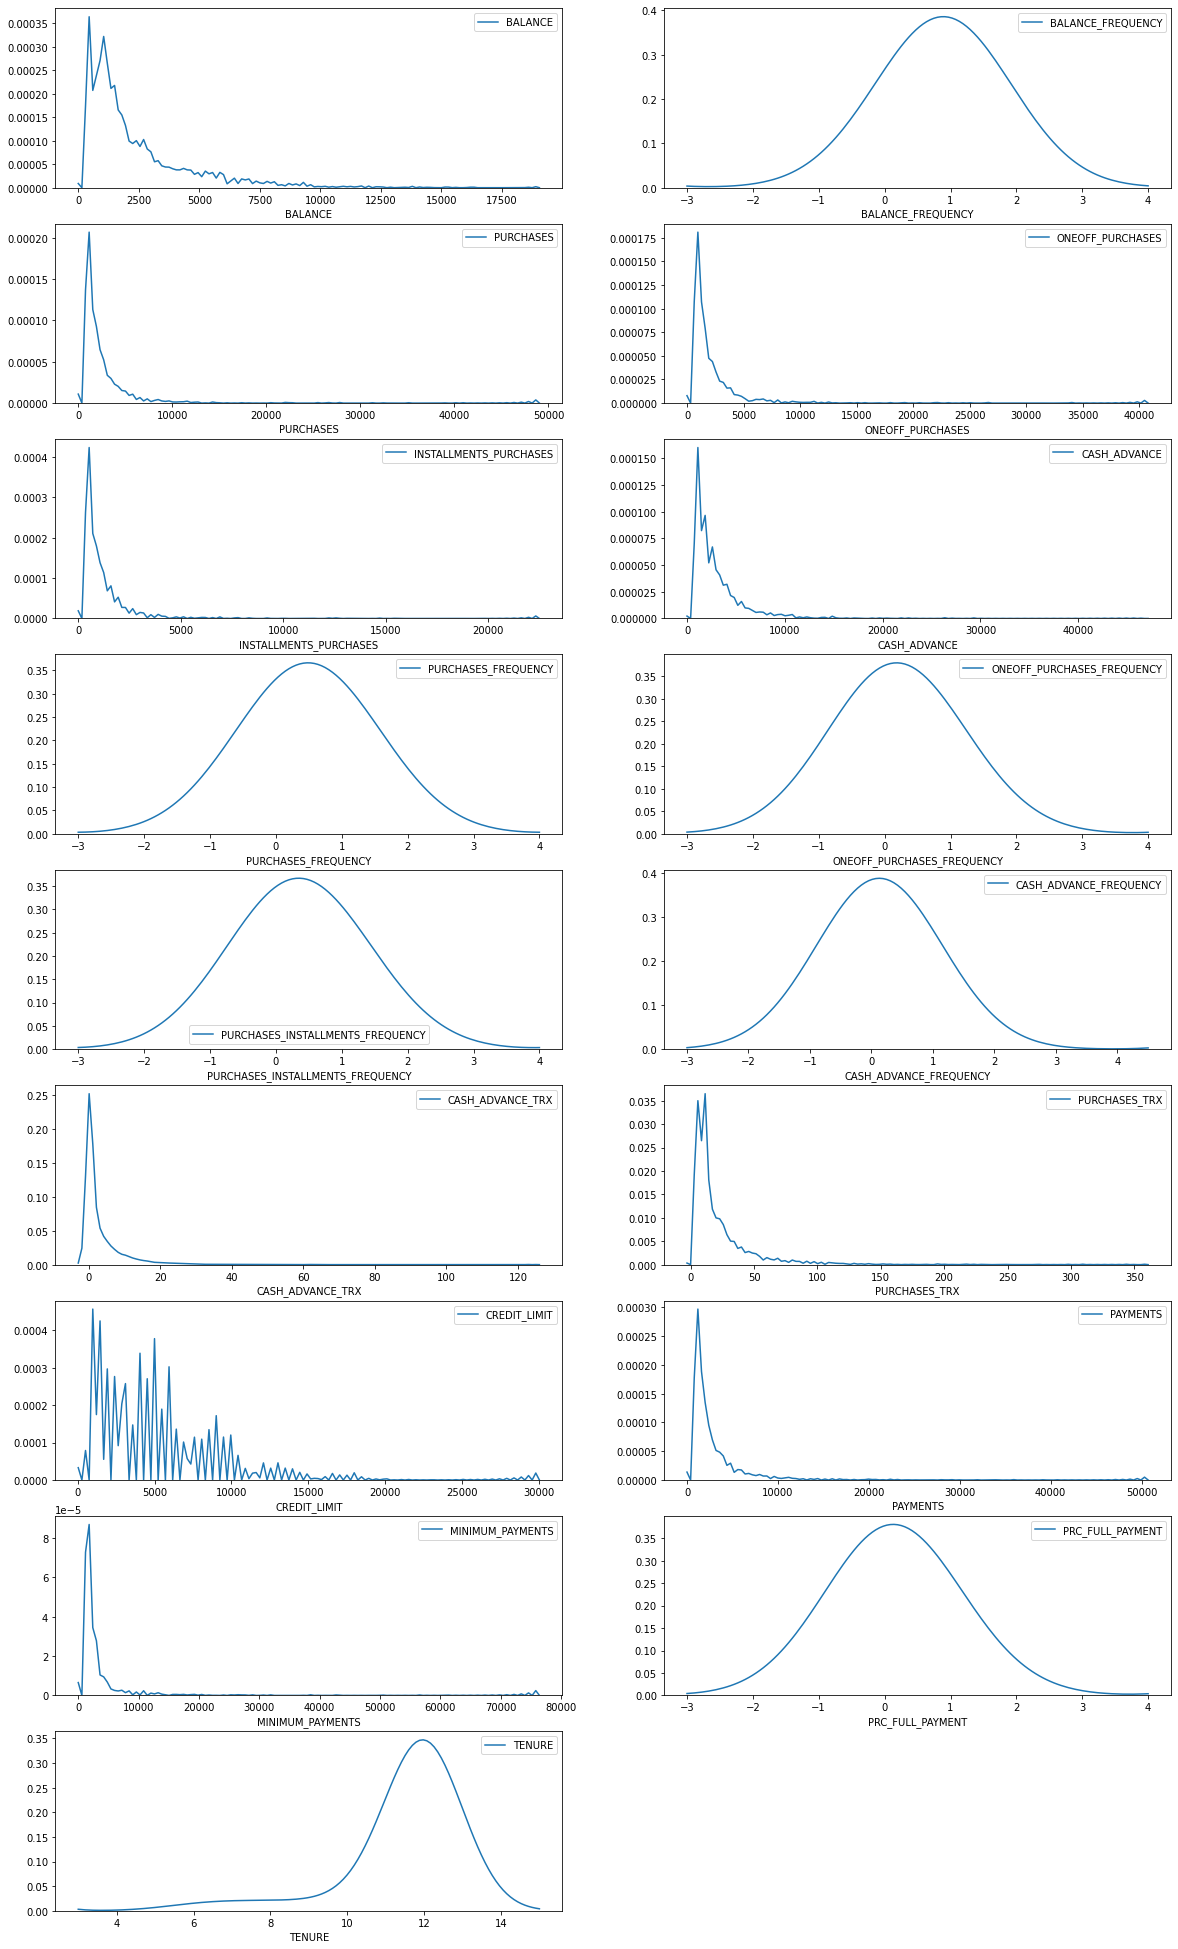

In [35]:
plt.figure(figsize=(20,35))
for i,col in enumerate(df.columns):
    if df[col].dtype!='object':
        ax=plt.subplot(9,2,i+1)
        sns.kdeplot(df[col],ax=ax,bw=1)
        plt.xlabel(col)
plt.show()

As we can see there is a lot of skewness and they are varied. It is kind of expected from datasets like these as there will always be a few customers who do very high amount of transactions.

Now it depends on our application whether we want to handle the skewness in our dataset or not for a clustering problem. For instance if we want to do clustering for anamoly detection in that case we wouldn't want to handle the outliers as we would like our model to detect them and group them in a cluster. For our application I am looking for a good visualization so I would like to handle the skewness as much as possible as it will help the model to form better clusters.

Let's see if we can do something about this.

In [36]:
cols = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

In [37]:
for col in cols:
    df[col] = np.log(1 + df[col])

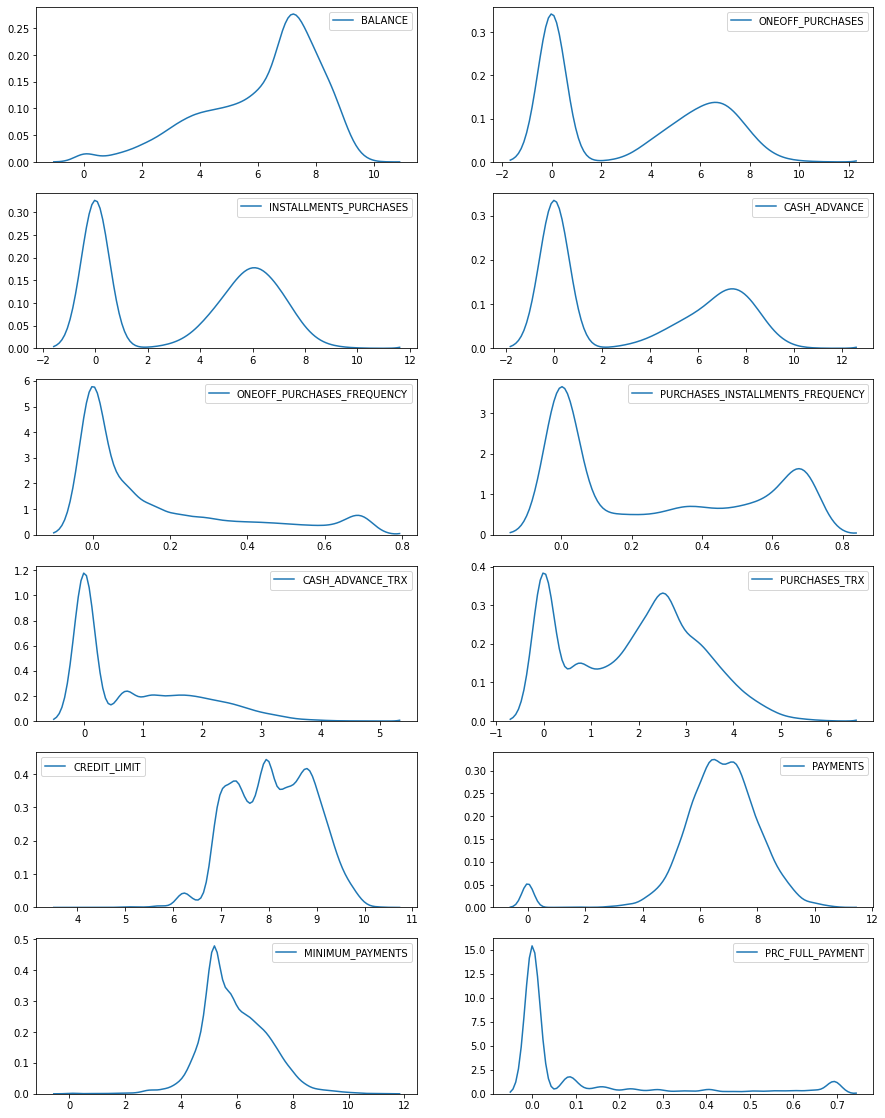

In [38]:
plt.figure(figsize=(15,20))
for i, col in enumerate(cols):
    ax = plt.subplot(6, 2, i+1)
    sns.kdeplot(df[col], ax=ax)
plt.show()

I know it may not look like an ideal distribution but it is better than what we had and it is our job as data scientist to help our model as much as possible.

Looking for some correlation now.

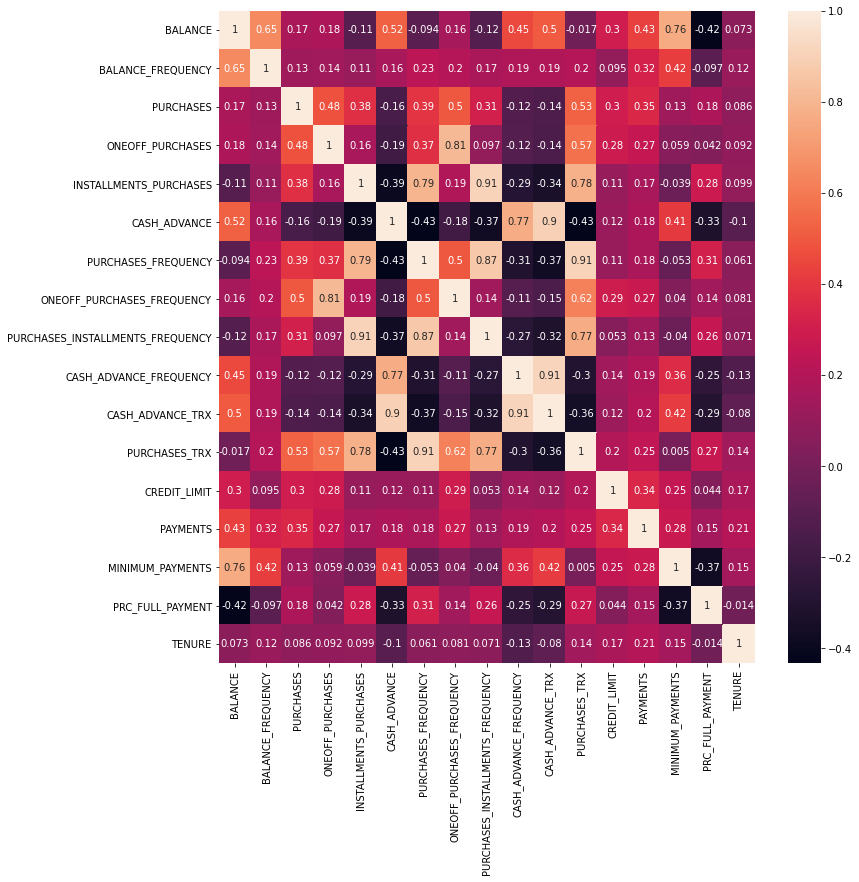

In [39]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

We've got some correlated features there. There are many ways to handle this. We would go ahead with dimensionality reduction and we will bring our data down to lower dimension.

We will use PCA for our dimensionality reduction.

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_red = pca.fit_transform(df)

With that we are ready to do what we have always wanted to do i.e Clustering. We will use Kmeans clustering algorithm to extracts clusters of information from our dataset.

**5. Model Training**

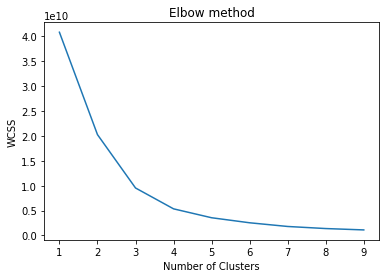

In [44]:
from sklearn.cluster import KMeans
kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(X_red) for k in range (1, 10)]
innertia=[model.inertia_ for model in kmeans_models]

plt.plot(range(1,10),innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

It seems like the elbow is around 3 or 4 . We will use silhouette score to see which one performs better.

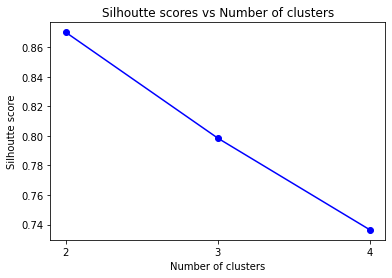

In [47]:
from sklearn.metrics import silhouette_score
silhoutte_scores=[silhouette_score(X_red,model.labels_) for model in kmeans_models[1:4]]
plt.plot(range(2,5), silhoutte_scores, "bo-")
plt.xticks([2,3,4])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

Well, we were wrong n=2 seems to have higher silhouette than the other two. It is what it is, we will select 2 as our number of clusters.

In [51]:
from sklearn.metrics import silhouette_score
kmeans=KMeans(n_clusters=2, random_state=23)
kmeans.fit(X_red)
print('Silhoutte score of our model is'+str(silhouette_score(X_red,kmeans.labels_)))

Silhoutte score of our model is0.8700455999561806


Assigning labels as cluster index to our dataset.

In [52]:
df['cluster_id']=kmeans.labels_

Inverse transforming the log transformation that we did earlier to visualize the results on original scale.

In [53]:
for col in cols:
    df[col]=np.exp(df[col])

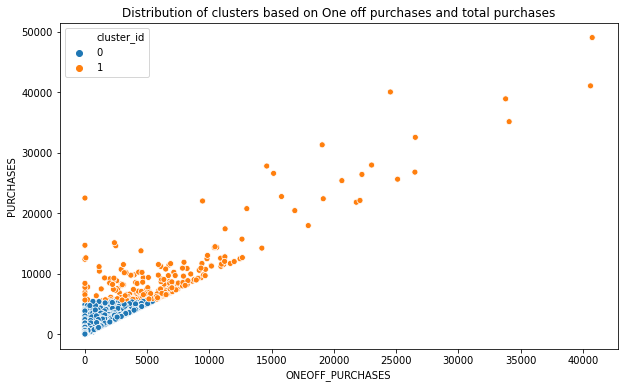

In [55]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='ONEOFF_PURCHASES',y='PURCHASES',hue='cluster_id')
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.show()

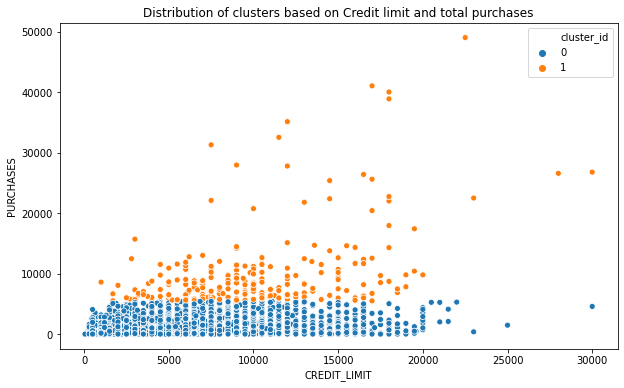

In [56]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='CREDIT_LIMIT',y='PURCHASES',hue='cluster_id')
plt.title('Distribution of clusters based on Credit limit and total purchases')
plt.show()

Looking at the above 2 plots it seems like our model has clustered customers with low usage of credit card in one cluster and model with higher usage of clusters in other. Great! we direct of resources accordingly.

Lets once check with 3 clusters too.

In [60]:
kmeans=KMeans(n_clusters=3, random_state=23)
kmeans.fit(X_red)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=23, tol=0.0001, verbose=0)

In [61]:
df['cluster_id']=kmeans.labels_

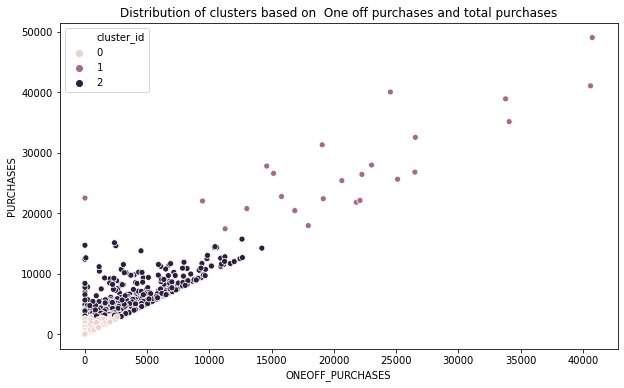

In [62]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='ONEOFF_PURCHASES',y='PURCHASES',hue='cluster_id')
plt.title('Distribution of clusters based on  One off purchases and total purchases')
plt.show()

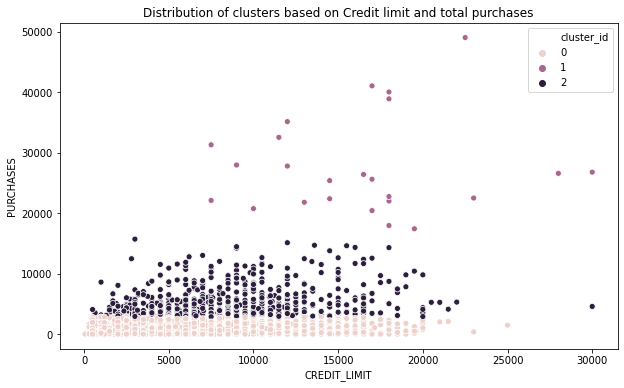

In [63]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster_id')
plt.title('Distribution of clusters based on Credit limit and total purchases')
plt.show()

This seems to be better clustering as it really segments out top half of customers having more than usual amount of credit card and the customers which have very low usage. This seems to be more actionable result if we want to direct  our marketing strategies according to usage of credit card.